In [1]:
%load_ext autoreload
%autoreload 2
import mkl
mkl.set_num_threads(1)

48

In [2]:
#%run ../../core/prepare_histograms.py
#%run ../../core/event_numbers.py

# Imports

In [3]:
import pickle
import numpy as np
import astropy.units as u

from matplotlib.lines import Line2D
from tools import *
from settings import *
import matplotlib.pyplot as plt
import seaborn as sns

Could not import healpy.
functions plot_area, add_catalog, and add_extended_plane will not work.


# coordinates

In [4]:
### colorful
if True:
    poles["IceCube"]["color"] = "k"
    poles["P-ONE"]["color"] = "#a50000"
    poles["KM3NeT"]["color"] = colors[1] #"#a50000"
    poles["Baikal-GVD"]["color"] = "purple"
else:
    ### p-one highlight
    poles["IceCube"]["color"] = "k"
    poles["P-ONE"]["color"] = "#a50000"
    poles["KM3NeT"]["color"] = colors[0]
    poles["Baikal-GVD"]["color"] = colors[2]

## get all detection efficiencies $\propto N_{detected}$ per fixed livetime

In [5]:
with open(join(LOCALPATH, "detection_efficiencies.pckl"), "rb") as f:
    tcks, padded_sd = pickle.load(f)


## IceCube only

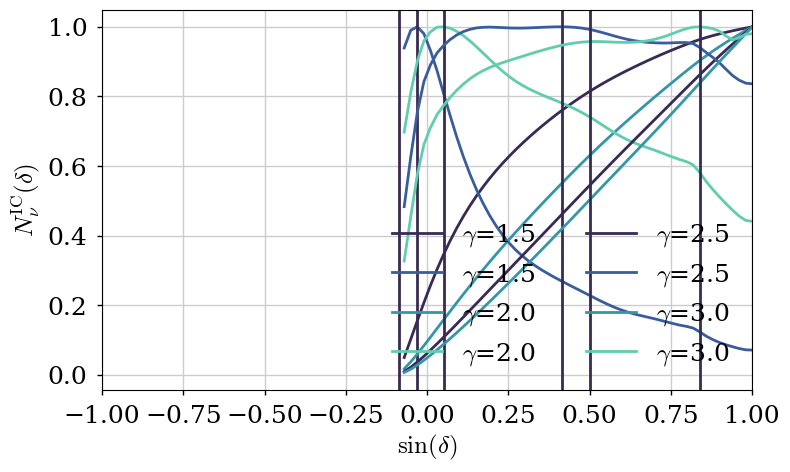

In [6]:
sindec_vals = np.linspace(-1, 1, 100)
gammas = [1.5, 2.0, 2.5, 3.0]
fig, ax = plt.subplots()
for gamma in gammas:
    eff = np.exp(tcks[gamma]["IceCube"](sindec_vals)) * LIVETIME * PHI_0
    mask = sindec_vals >= np.sin(np.deg2rad(-5))
    p = ax.plot(sindec_vals[mask], np.cumsum(eff[mask]) / np.sum(eff[mask]), label=r"$\gamma$={0:.1f}".format(gamma))
    p = ax.plot(sindec_vals[mask], eff[mask] / np.max(eff[mask]), label=r"$\gamma$={0:.1f}".format(gamma))
    ax.axvline(sindec_vals[mask][np.argmax(eff[mask])])

ax.legend(ncol=2, frameon=False, loc=4)
ax.set_xlabel(r"$\sin(\delta)$")
ax.set_ylabel(r"$N_{\nu}^{\rm IC}(\delta)$")

ax.set_xlim(-1, 1)

ax.axvline(np.sin(np.deg2rad(-5)))
ax.axvline(np.sin(np.deg2rad(30)))

fig.tight_layout()
plt.subplots_adjust(top=0.85)
# if False:
#     ax.set_yscale("log")
# else:
#     #plt.ylim(10, 30)
#     #plt.xlim(-0.2, 0.55)


## all detectors
equal contribution, detection efficiency relative to icecube at respective declination

1.5
PLENUM-1 Improv at GC: 6.31231088753793
PLENUM-1 Improv at txs0506: 2.461844718161991
PLENUM-1 Improv at ngc1068: 2.001214889103848

PLENUM-2 Improv at GC: 12.812326756176535
PLENUM-2 Improv at txs0506: 8.961837420138952
PLENUM-2 Improv at ngc1068: 8.501237129153951
- - - - - - - - - - 
2.0
PLENUM-1 Improv at GC: 28.641333032414572
PLENUM-1 Improv at txs0506: 2.3798340407961467
PLENUM-1 Improv at ngc1068: 2.43919584066394

PLENUM-2 Improv at GC: 35.1413492233732
PLENUM-2 Improv at txs0506: 8.879833758477542
PLENUM-2 Improv at ngc1068: 8.939191895841581
- - - - - - - - - - 
2.5
PLENUM-1 Improv at GC: 286.55003289518766
PLENUM-1 Improv at txs0506: 2.5143091040057146
PLENUM-1 Improv at ngc1068: 2.8157401213227025

PLENUM-2 Improv at GC: 293.05003684108374
PLENUM-2 Improv at txs0506: 9.014310730989388
PLENUM-2 Improv at ngc1068: 9.315767855306067
- - - - - - - - - - 
3.0
PLENUM-1 Improv at GC: 4097.95809216187
PLENUM-1 Improv at txs0506: 2.6391732504455034
PLENUM-1 Improv at ngc1068: 3

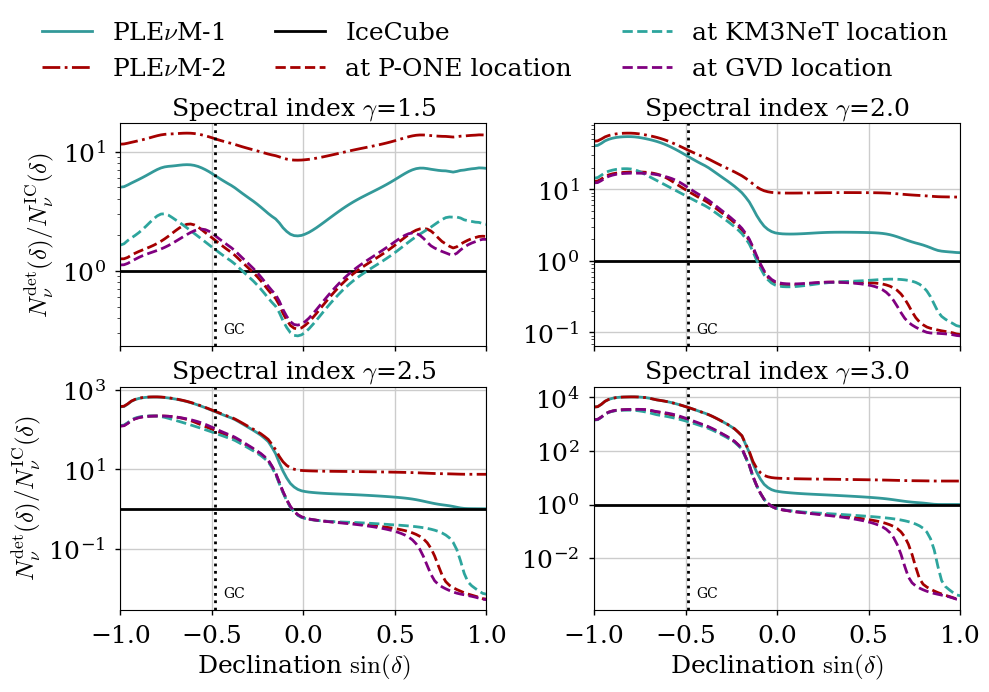

In [7]:
sindec_vals = np.linspace(-1, 1, 100)

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(10, 7))
axes = axes.flatten()
for ii, gamma in enumerate(gammas):
    ax = axes[ii]
    for det in tcks[gamma]:
        if "Gen" in det:
            continue
        Res = np.exp(tcks[gamma][det](sindec_vals)) / np.exp(
            tcks[gamma]["IceCube"](sindec_vals)
        )
        p = ax.plot(
            sindec_vals,
            Res,
            label=poles[det]["label"] if ii == 0 else "",
            color=poles[det]["color"],
            ls=poles[det]["ls"],
            lw=2,
        )
    ax.set_title(
        r"Spectral index $\gamma$={0:.1f}".format(gamma)
    )
    ax.axvline(np.sin(sgr_a.icrs.dec), color="k", ls=":")
    # ax.axvline(np.sin(txs0506.icrs.dec), color="k", ls=":")
    ax.set_yscale("log")
    ax.set_xlim(-1, 1)
    ax.text(0.28, 0.055, "GC", transform=ax.transAxes)
    # calculate the improvement with PLEnuM relative to IceCube
    if True:
        print(gamma)
        improv_sgr = np.exp(tcks[gamma]["Plenum-1"](np.sin(sgr_a.icrs.dec))) / np.exp(
            tcks[gamma]["IceCube"](np.sin(sgr_a.icrs.dec))
        )
        improv_txs0506 = np.exp(
            tcks[gamma]["Plenum-1"](np.sin(txs0506.icrs.dec))
        ) / np.exp(tcks[gamma]["IceCube"](np.sin(txs0506.icrs.dec)))
        improv_ngc1068 = np.exp(
            tcks[gamma]["Plenum-1"](np.sin(ngc1068.icrs.dec))
        ) / np.exp(tcks[gamma]["IceCube"](np.sin(ngc1068.icrs.dec)))
        print("PLENUM-1 Improv at GC:", improv_sgr)
        print("PLENUM-1 Improv at txs0506:", improv_txs0506)
        print("PLENUM-1 Improv at ngc1068:", improv_ngc1068)
        print("")

        improv_sgr = np.exp(tcks[gamma]["Plenum-2"](np.sin(sgr_a.icrs.dec))) / np.exp(
            tcks[gamma]["IceCube"](np.sin(sgr_a.icrs.dec))
        )
        improv_txs0506 = np.exp(
            tcks[gamma]["Plenum-2"](np.sin(txs0506.icrs.dec))
        ) / np.exp(tcks[gamma]["IceCube"](np.sin(txs0506.icrs.dec)))
        improv_ngc1068 = np.exp(
            tcks[gamma]["Plenum-2"](np.sin(ngc1068.icrs.dec))
        ) / np.exp(tcks[gamma]["IceCube"](np.sin(ngc1068.icrs.dec)))
        print("PLENUM-2 Improv at GC:", improv_sgr)
        print("PLENUM-2 Improv at txs0506:", improv_txs0506)
        print("PLENUM-2 Improv at ngc1068:", improv_ngc1068)
        print("- "*10)

axes[2].set_xlabel(r"Declination $\sin(\delta)$")
axes[3].set_xlabel(r"Declination $\sin(\delta)$")
axes[0].set_ylabel(r"$N_{\nu}^{\rm det}(\delta) / N_{\nu}^{\rm IC}(\delta)$")
axes[2].set_ylabel(r"$N_{\nu}^{\rm det}(\delta) / N_{\nu}^{\rm IC}(\delta)$")
fig.legend(loc="upper center", ncol=3, frameon=False)
fig.tight_layout()
plt.subplots_adjust(top=0.82)
fig.savefig(join(BASEPATH, "plots/relative_detection_eff_dIC_vs_sindec.pdf"))


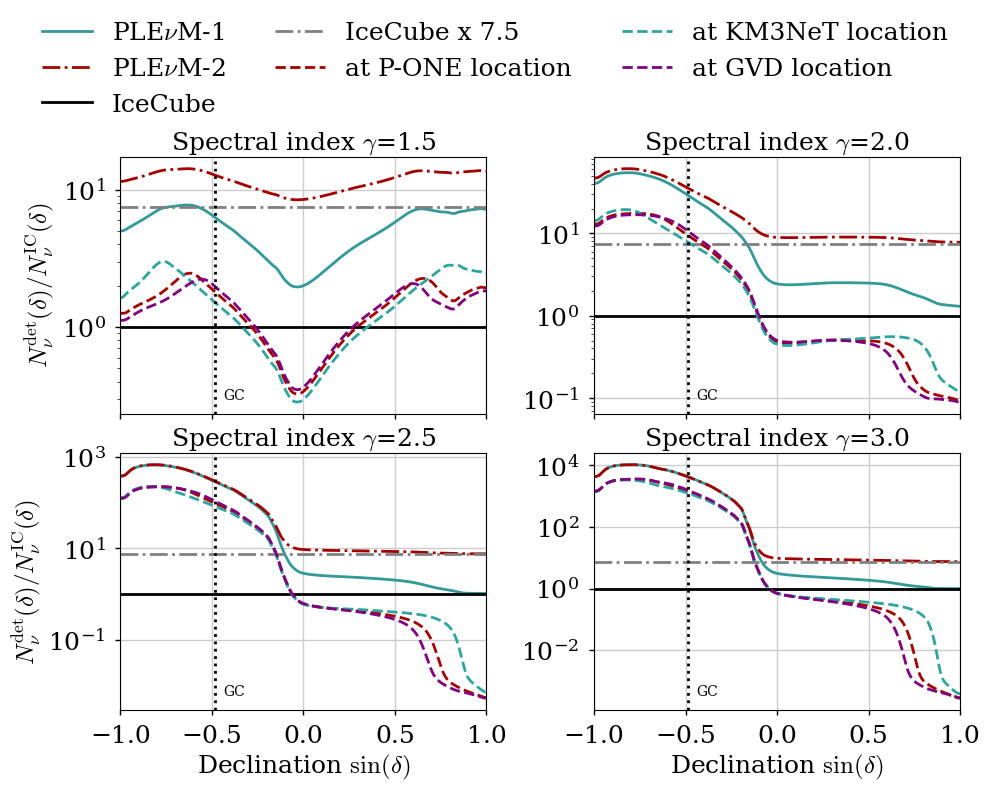

In [8]:
sindec_vals = np.linspace(-1, 1, 1000)

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(10, 8))
axes = axes.flatten()
for ii, gamma in enumerate(gammas):
    ax = axes[ii]
    for det in tcks[gamma]:
        Res = np.exp(tcks[gamma][det](sindec_vals)) / np.exp(
            tcks[gamma]["IceCube"](sindec_vals)
        )
        p = ax.plot(
            sindec_vals,
            Res,
            label=poles[det]["label"] if ii == 0 else "",
            color=poles[det]["color"],
            ls=poles[det]["ls"],
            lw=2,
        )
    ax.set_title(r"Spectral index $\gamma$={0:.1f}".format(gamma))
    ax.axvline(np.sin(sgr_a.icrs.dec), color="k", ls=":")
    # ax.axvline(np.sin(txs0506.icrs.dec), color="k", ls=":")
    ax.set_yscale("log")
    ax.set_xlim(-1, 1)
    ax.text(0.28, 0.055, "GC", transform=ax.transAxes)


axes[2].set_xlabel(r"Declination $\sin(\delta)$")
axes[3].set_xlabel(r"Declination $\sin(\delta)$")
axes[0].set_ylabel(r"$N_{\nu}^{\rm det}(\delta) / N_{\nu}^{\rm IC}(\delta)$")
axes[2].set_ylabel(r"$N_{\nu}^{\rm det}(\delta) / N_{\nu}^{\rm IC}(\delta)$")
fig.legend(loc="upper center", ncol=3, frameon=False)
fig.tight_layout()
plt.subplots_adjust(top=0.8)
fig.savefig(join(BASEPATH, "plots/relative_detection_eff_dIC_vs_sindec_wGen2.pdf"))


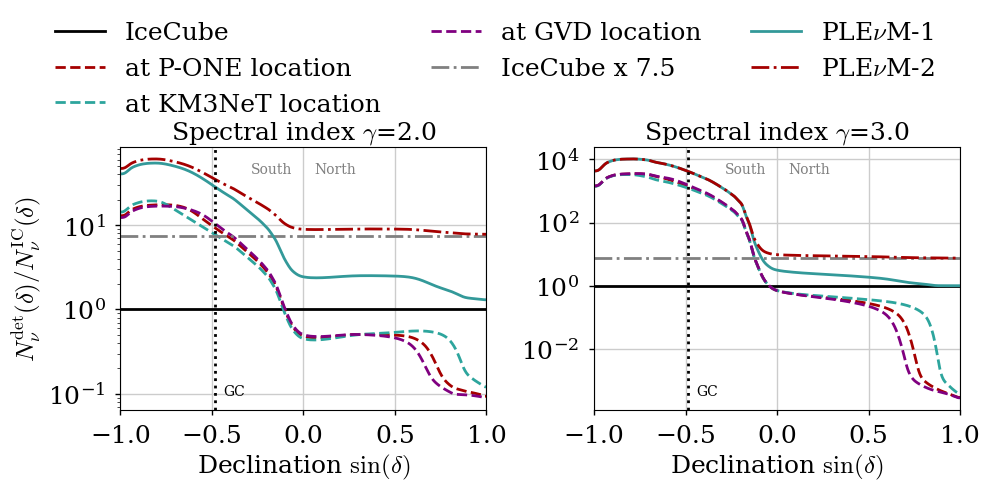

In [9]:
sindec_vals = np.linspace(-1, 1, 1000)

fig, axes = plt.subplots(ncols=2, sharex=True, figsize=(10, 5))
axes = axes.flatten()
for ii, gamma in enumerate([2.0, 3.0]):
    ax = axes[ii]
    for det in [
        "IceCube",
        "P-ONE",
        "KM3NeT",
        "Baikal-GVD",
        "Gen-2",
        "Plenum-1",
        "Plenum-2",
    ]:
        Res = np.exp(tcks[gamma][det](sindec_vals)) / np.exp(
            tcks[gamma]["IceCube"](sindec_vals)
        )
        p = ax.plot(
            sindec_vals,
            Res,
            label=poles[det]["label"] if ii == 0 else "",
            color=poles[det]["color"],
            ls=poles[det]["ls"],
            lw=2,
        )
    ax.set_title(r"Spectral index $\gamma$={0:.1f}".format(gamma))
    ax.axvline(np.sin(sgr_a.icrs.dec), color="k", ls=":")
    # ax.axvline(np.sin(txs0506.icrs.dec), color="k", ls=":")
    ax.set_yscale("log")
    ax.set_xlim(-1, 1)
    ax.text(0.28, 0.055, "GC", transform=ax.transAxes)
    ax.text(
        0.47,
        0.9,
        "South",
        transform=ax.transAxes,
        color="gray",
        ha="right",
    )
    ax.text(
        0.53,
        0.9,
        "North",
        transform=ax.transAxes,
        color="gray",
        ha="left",
    )

axes[0].set_xlabel(r"Declination $\sin(\delta)$")
axes[1].set_xlabel(r"Declination $\sin(\delta)$")
axes[0].set_ylabel(r"$N_{\nu}^{\rm det}(\delta) / N_{\nu}^{\rm IC}(\delta)$")
fig.legend(loc="upper center", ncol=3, frameon=False)
fig.tight_layout()
plt.subplots_adjust(top=0.7)
fig.savefig(join(BASEPATH, "relative_detection_eff_dIC_vs_sindec_wGen2_smaller.pdf"))


## improvement for specific sources

In [10]:
print(txs0506, ngc1068)
gamma_txs0506 = 2
n_txs0506 = 5.4
gamma_ngc1068 = 3.2
n_ngc1068 = 79 #50.4


<SkyCoord (ICRS): (ra, dec) in deg
    (77.36, 5.69)> <SkyCoord (ICRS): (ra, dec) in deg
    (40.67, -0.01)>


In [11]:
improv_txs0506_1 = np.exp(
    tcks[gamma_txs0506]["Plenum-1"](np.sin(txs0506.icrs.dec))
) / np.exp(tcks[gamma_txs0506]["IceCube"](np.sin(txs0506.icrs.dec)))
improv_txs0506_2 = np.exp(
    tcks[gamma_txs0506]["Plenum-2"](np.sin(txs0506.icrs.dec))
) / np.exp(tcks[gamma_txs0506]["IceCube"](np.sin(txs0506.icrs.dec)))
print(
    "txs0506 in icecube: n=",
    n_txs0506,
    "gamma=",
    gamma_txs0506,
)
print(
    "txs0506 in plenum-1: n=",
    improv_txs0506_1 * n_txs0506,
    f"({improv_txs0506_1})",
    ", txs0506 in plenum-2: n=",
    improv_txs0506_2 * n_txs0506,
    f"({improv_txs0506_2})",
)

improv_ngc1068_1 = np.exp(
    tcks[gamma_ngc1068]["Plenum-1"](np.sin(ngc1068.icrs.dec))
) / np.exp(tcks[gamma_ngc1068]["IceCube"](np.sin(ngc1068.icrs.dec)))
improv_ngc1068_2 = np.exp(
    tcks[gamma_ngc1068]["Plenum-2"](np.sin(ngc1068.icrs.dec))
) / np.exp(tcks[gamma_ngc1068]["IceCube"](np.sin(ngc1068.icrs.dec)))
print(
    "ngc1068 in icecube: n=",
    n_ngc1068,
    "gamma=",
    gamma_ngc1068,
)
print(
    
    "ngc1068 in plenum-1: n=",
    improv_ngc1068_1 * n_ngc1068,
    f"({improv_ngc1068_1})",
    ", ngc1068 in plenum-2: n=",
    improv_ngc1068_2 * n_ngc1068,
    f"({improv_ngc1068_2})",
)


txs0506 in icecube: n= 5.4 gamma= 2
txs0506 in plenum-1: n= 12.851103820299192 (2.3798340407961467) , txs0506 in plenum-2: n= 47.95110229577873 (8.879833758477542)
ngc1068 in icecube: n= 79 gamma= 3.2
ngc1068 in plenum-1: n= 254.63597601442532 (3.2232402027142446) , ngc1068 in plenum-2: n= 768.1422085745817 (9.72331909588078)


## all detectors 
detection efficiency 1D (sin dec) relative to icecube at horizon

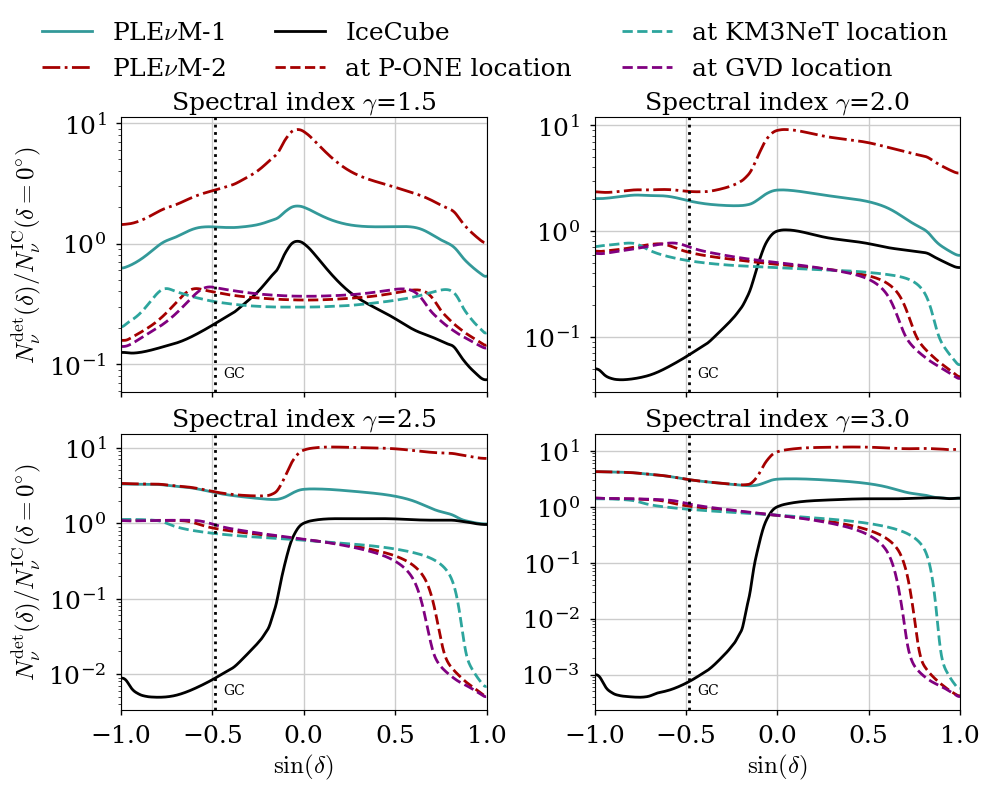

In [12]:
gammas = [1.5, 2.0, 2.5, 3.0]
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(10, 8))
axes = axes.flatten()
for ii, gamma in enumerate(gammas):
    ax = axes[ii]
    # detection efficiency of IceCube for specific spectral index at the horizon
    ## NOTE: maximum detection efficiency changes with spectral index, so we fix this to the horizon here
    arb_max_ic = np.exp(tcks[gamma]["IceCube"](0))
    for det in tcks[gamma]:
        if "Gen" in det:
            continue
        Res = np.exp(tcks[gamma][det](sindec_vals)) / arb_max_ic
        p = ax.plot(
            sindec_vals,
            Res,
            label=poles[det]["label"] if ii == 0 else "",
            color=poles[det]["color"],
            ls=poles[det]["ls"],
            lw=2,
        )
    ax.set_title(r"Spectral index $\gamma$={0:.1f}".format(gamma))
    ax.axvline(np.sin(sgr_a.icrs.dec), color="k", ls=":")
    # ax.axvline(np.sin(txs0506.icrs.dec), color="k", ls=":")
    ax.set_yscale("log")
    ax.set_xlim(-1, 1)
    ax.text(0.28, 0.055, "GC", transform=ax.transAxes)

axes[2].set_xlabel(r"$\sin(\delta)$")
axes[3].set_xlabel(r"$\sin(\delta)$")
axes[0].set_ylabel(r"$N_{\nu}^{\rm det}(\delta) / N_{\nu}^{\rm IC}(\delta=0^{\circ})$")
axes[2].set_ylabel(r"$N_{\nu}^{\rm det}(\delta) / N_{\nu}^{\rm IC}(\delta=0^{\circ})$")
fig.legend(
    loc="upper center",
    ncol=3,
    frameon=False,
)
fig.tight_layout()
plt.subplots_adjust(top=0.85)
fig.savefig(join(BASEPATH, "plots/relative_detection_eff_d0_vs_sindec.pdf"))
